<a href="https://colab.research.google.com/github/AdityaMishra1103/Astrico-AI-Project-Aditya/blob/main/Final_LY_Project_Brain_Tumour_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import cv2
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import files

# Upload kaggle.json to authenticate Kaggle API
files.upload()

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Dataset
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/Training/glioma/Tr-gl_0727.jpg  
  inflating: /content/Training/glioma/Tr-gl_0728.jpg  
  inflating: /

In [ ]:
# Define dataset path
train_path = '/content/Training'
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

X_train = []
Y_train = []

for label in labels:
    folderPath = os.path.join(train_path, label)
    for img_name in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, img_name))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Shuffle the dataset
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Convert labels to categorical
y_train = np.array([labels.index(i) for i in y_train])
y_test = np.array([labels.index(i) for i in y_test])

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

# Save Model & Training History
model.save('/content/drive/MyDrive/braintumor_model.h5')

with open('/content/drive/MyDrive/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 915s 6s/step - accuracy: 0.3333 - loss: 4.0672 - val_accuracy: 0.6654 - val_loss: 0.8568
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 943s 6s/step - accuracy: 0.6690 - loss: 0.8002 - val_accuracy: 0.7665 - val_loss: 0.6205
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 970s 6s/step - accuracy: 0.7797 - loss: 0.5762 - val_accuracy: 0.8113 - val_loss: 0.5133
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 923s 6s/step - accuracy: 0.8545 - loss: 0.4051 - val_accuracy: 0.8891 - val_loss: 0.3279
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 936s 6s/step - accuracy: 0.8782 - loss: 0.3326 - val_accuracy: 0.8619 - val_loss: 0.3304
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 977s 6s/step - accuracy: 0.8984 - loss: 0.2775 - val_accuracy: 0.9105 - val_loss: 0.2551
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 972s 6s/step - accuracy: 0.9139 - loss: 0.2295 - val_accuracy: 0.7918 - val_loss: 0.5047
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 895s 6s/step - accuracy: 0.9117 - loss: 0.2204 - val_accu

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_flat, np.argmax(y_train, axis=1))
y_pred_dt = dt.predict(X_test_flat)
dt_acc = accuracy_score(np.argmax(y_test, axis=1), y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_flat, np.argmax(y_train, axis=1))
y_pred_rf = rf.predict(X_test_flat)
rf_acc = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_flat
, np.argmax(y_train, axis=1))
y_pred_svm = svm.predict(X_test_flat)
svm_acc = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)

# Print Accuracy Results
print(f"Decision Tree Accuracy: {dt_acc * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")
print(f"CNN Max Training Accuracy: {max(history.history['accuracy']) * 100:.2f}%")
print(f"CNN Max Validation Accuracy: {max(history.history['val_accuracy']) * 100:.2f}%")


Decision Tree Accuracy: 86.89%
Random Forest Accuracy: 93.36%
SVM Accuracy: 87.06%
CNN Max Training Accuracy: 97.45%
CNN Max Validation Accuracy: 93.77%


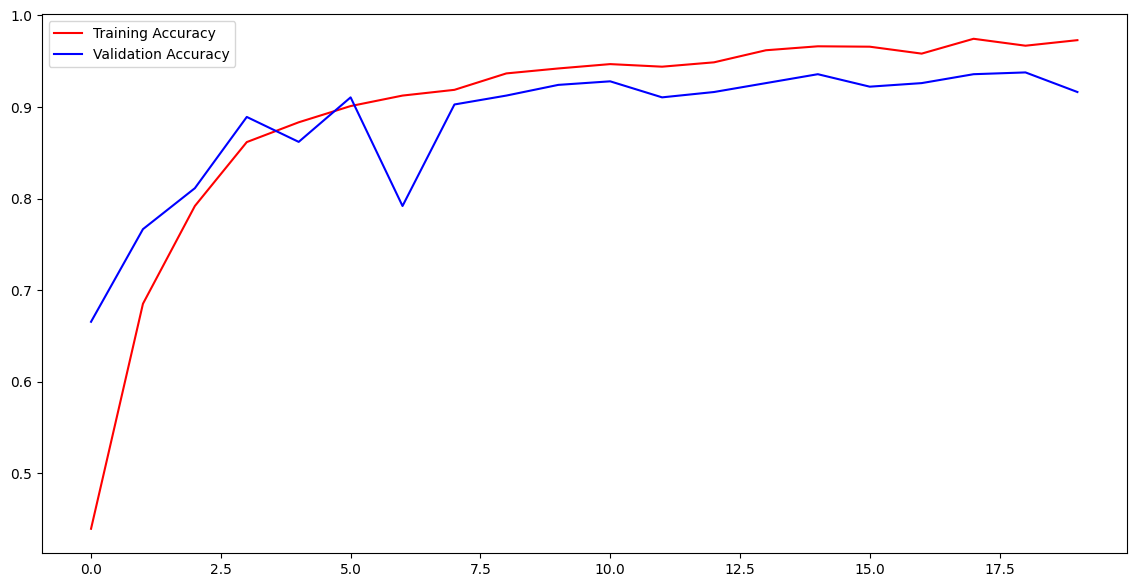

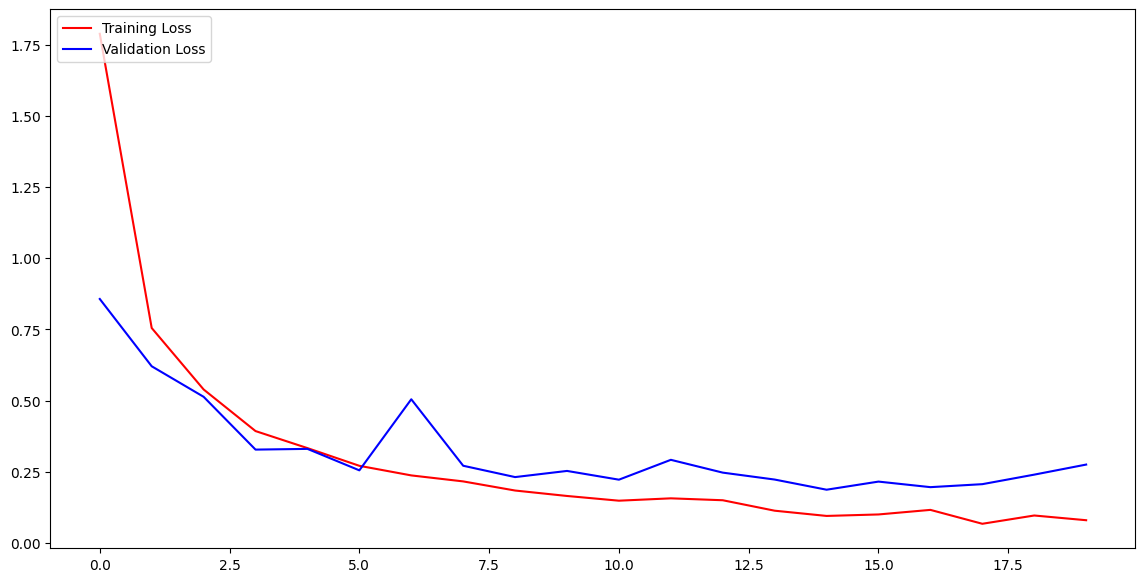

In [ ]:
# Load Training History
with open('/content/drive/MyDrive/history.pkl', 'rb') as f:
    history = pickle.load(f)

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# Plot Loss
plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper left')
plt.show()


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
import os

# Upload the model file first (if you have it)
print("Please upload your trained brain tumor model (.h5 file):")
model_file = files.upload()  # This will prompt you to upload the model file

# Get the filename of the uploaded model
model_filename = list(model_file.keys())[0]
model_path = f"/content/{model_filename}"

# Load the model from the uploaded file
model = load_model(model_path)
print(f"Model loaded successfully from {model_path}")

# Now upload the image to classify
print("Please upload an image to classify:")
uploaded_files = files.upload()

for filename in uploaded_files.keys():
    try:
        # Ensure correct file path (Colab saves uploads in the current directory)
        img_path = f"/content/{filename}"

        # Read the image
        img = cv2.imread(img_path)

        if img is not None:
            # Convert BGR to RGB (important for models trained on RGB images)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize and normalize image
            img = cv2.resize(img, (150, 150))
            img_array = np.array(img).reshape(1, 150, 150, 3) / 255.0

            # Predict
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # Classification results
            labels = ["Glioma Tumor", "Meningioma Tumor", "No Tumor", "Pituitary Tumor"]
            print(f"There are high chances of Patient having {labels[predicted_class]}")

        else:
            print(f"Error: Unable to read image {filename}. Check the file format.")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

Please upload your trained brain tumor model (.h5 file):


Saving braintumor_model.h5 to braintumor_model.h5


Model loaded successfully from /content/braintumor_model.h5
Please upload an image to classify:


Saving Meningioma_Testing1.jpg to Meningioma_Testing1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
There are high chances of Patient having No Tumor
